# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Settings

In [7]:
pd.set_option('display.max_columns', None)
sns.set(style="white")

# Load Dataset

In [70]:
# Load CSVs
employee_df = pd.read_csv("D:\\Pratham\\Projects\\Employee Attrition and Workforce Report\\Employee.csv")
satisfaction_df = pd.read_csv("D:\\Pratham\\Projects\\Employee Attrition and Workforce Report\\Satisfaction Level.csv")
performance_df = pd.read_csv("D:\\Pratham\\Projects\\Employee Attrition and Workforce Report\\Performance Rating.csv")
education_df = pd.read_csv("D:\\Pratham\\Projects\\Employee Attrition and Workforce Report\\Education.csv")
rating_df = pd.read_csv("D:\\Pratham\\Projects\\Employee Attrition and Workforce Report\\Rating.csv")

df_combined = pd.concat([employee_df, satisfaction_df, performance_df, education_df, rating_df], ignore_index=True)
df_combined

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,Education,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,SatisfactionID,SatisfactionLevel,PerformanceID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating,EducationLevelID,EducationLevel,RatingID,RatingLevel
0,3012-1A41,Leonelle,Simco,Female,30.0,Some Travel,Sales,27.0,IL,White,5.0,Marketing,Sales Executive,Divorced,102059.0,1.0,No,1/3/2012,No,10.0,4.0,9.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CBCB-9C9D,Leonerd,Aland,Male,38.0,Some Travel,Sales,23.0,CA,White,4.0,Marketing,Sales Executive,Single,157718.0,0.0,Yes,1/4/2012,No,10.0,6.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,95D7-1CE9,Ahmed,Sykes,Male,43.0,Some Travel,Human Resources,29.0,CA,Asian or Asian American,4.0,Marketing,HR Business Partner,Married,309964.0,1.0,No,1/4/2012,No,10.0,6.0,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39.0,Some Travel,Technology,12.0,IL,White,3.0,Computer Science,Engineering Manager,Married,293132.0,0.0,No,1/5/2012,No,10.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42CC-040A,Stace,Savege,Female,29.0,Some Travel,Human Resources,29.0,CA,White,2.0,Technical Degree,Recruiter,Single,49606.0,0.0,No,1/5/2012,Yes,6.0,1.0,1.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Unacceptable
8190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Needs Improvement
8191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Meets Expectation
8192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,Exceeds Expectation


# Initial Data Inspection

In [28]:
print(df.shape)

(6899, 35)


In [30]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   employeeid                       6899 non-null   object 
 1   firstname                        6899 non-null   object 
 2   lastname                         6899 non-null   object 
 3   gender                           6899 non-null   object 
 4   age                              6899 non-null   int64  
 5   businesstravel                   6899 non-null   object 
 6   department                       6899 non-null   object 
 7   distancefromhomekm               6899 non-null   int64  
 8   state                            6899 non-null   object 
 9   ethnicity                        6899 non-null   object 
 10  education                        6899 non-null   int64  
 11  educationfield                   6899 non-null   object 
 12  jobrole             

In [34]:
print(df.describe())

               age  distancefromhomekm    education         salary  \
count  6899.000000         6899.000000  6899.000000    6899.000000   
mean     30.604146           22.327874     2.866647  110898.374112   
std       7.986542           12.899799     1.028396   98427.862382   
min      18.000000            1.000000     1.000000   20387.000000   
25%      25.000000           12.000000     2.000000   44646.000000   
50%      28.000000           22.000000     3.000000   74458.000000   
75%      36.000000           33.000000     4.000000  137219.500000   
max      51.000000           45.000000     5.000000  547204.000000   

       stockoptionlevel  yearsatcompany  yearsinmostrecentrole  \
count       6899.000000     6899.000000            6899.000000   
mean           0.725467        5.578055               2.778953   
std            0.839724        3.410087               2.810170   
min            0.000000        0.000000               0.000000   
25%            0.000000        3.000000

In [32]:
print(df.head(10))

  employeeid firstname lastname  gender  age businesstravel department  \
0  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
1  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
2  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
3  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
4  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
5  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
6  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
7  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
8  3012-1A41  Leonelle    Simco  Female   30    Some Travel      Sales   
9  CBCB-9C9D   Leonerd    Aland    Male   38    Some Travel      Sales   

   distancefromhomekm state ethnicity  education educationfield  \
0                  27    IL     White          5      Marketing   
1                  27    IL     White          5   

In [36]:
print(df.corr(numeric_only=True))

                                      age  distancefromhomekm  education  \
age                              1.000000            0.019297  -0.031915   
distancefromhomekm               0.019297            1.000000  -0.012691   
education                       -0.031915           -0.012691   1.000000   
salary                           0.424894            0.077521   0.096723   
stockoptionlevel                 0.043346            0.035800   0.036668   
yearsatcompany                   0.642532           -0.024620  -0.039816   
yearsinmostrecentrole            0.415341           -0.016868  -0.039948   
yearssincelastpromotion          0.546807           -0.042576  -0.045126   
yearswithcurrmanager             0.452875            0.006512  -0.060374   
environmentsatisfaction          0.000761            0.003438  -0.016991   
jobsatisfaction                  0.005613           -0.011745   0.000133   
relationshipsatisfaction         0.004765            0.009588   0.009019   
trainingoppo

In [38]:
print(df.cov(numeric_only=True))

                                           age  distancefromhomekm  \
age                                  63.784854            1.988029   
distancefromhomekm                    1.988029          166.404806   
education                            -0.262132           -0.168361   
salary                           334008.793955        98427.828176   
stockoptionlevel                      0.290700            0.387792   
yearsatcompany                       17.499227           -1.083004   
yearsinmostrecentrole                 9.321734           -0.611481   
yearssincelastpromotion              13.991169           -1.759579   
yearswithcurrmanager                 10.099419            0.234550   
environmentsatisfaction               0.005679            0.041713   
jobsatisfaction                       0.051291           -0.174588   
relationshipsatisfaction              0.043702            0.143038   
trainingopportunitieswithinyear      -0.058076           -0.046397   
trainingopportunitie

In [48]:
print(f"The number of unique departments is: {df['department'].nunique()}")
print(f"The number of unique genders is: {df['gender'].nunique()}")
print(f"The number of unique job roles is: {df['jobrole'].nunique()}")
print(f"The number of unique attrition statuses is: {df['attrition'].nunique()}")
print(f"The number of unique business travel types is: {df['businesstravel'].nunique()}")
print(f"The number of unique marital statuses is: {df['maritalstatus'].nunique()}")

The number of unique departments is: 3
The number of unique genders is: 4
The number of unique job roles is: 13
The number of unique attrition statuses is: 2
The number of unique business travel types is: 3
The number of unique marital statuses is: 3


In [40]:
df.columns = df.columns.str.strip()

In [42]:
print("Columns:", df.columns.tolist())

Columns: ['employeeid', 'firstname', 'lastname', 'gender', 'age', 'businesstravel', 'department', 'distancefromhomekm', 'state', 'ethnicity', 'education', 'educationfield', 'jobrole', 'maritalstatus', 'salary', 'stockoptionlevel', 'overtime', 'hiredate', 'attrition', 'yearsatcompany', 'yearsinmostrecentrole', 'yearssincelastpromotion', 'yearswithcurrmanager', 'performanceid', 'reviewdate', 'environmentsatisfaction', 'jobsatisfaction', 'relationshipsatisfaction', 'trainingopportunitieswithinyear', 'trainingopportunitiestaken', 'worklifebalance', 'selfrating', 'managerrating', 'satisfactionid', 'satisfactionlevel']


# Advanced Analysis 

### 1. Employees per department.

In [52]:
df['department'].value_counts()

department
Technology         4375
Sales              2211
Human Resources     313
Name: count, dtype: int64

### 2. Gender ratio.

In [54]:
df['gender'].value_counts(normalize=True)

gender
Female               0.459632
Male                 0.443253
Non-Binary           0.087549
Prefer Not To Say    0.009567
Name: proportion, dtype: float64

### 3. Average salary per job role.

In [58]:
df.groupby('jobrole')['salary'].mean()

jobrole
Analytics Manager            350009.413146
Data Scientist                57234.834895
Engineering Manager          291836.527687
HR Business Partner          314482.160000
HR Executive                 102778.260504
HR Manager                   430520.235294
Machine Learning Engineer    133566.706186
Manager                      331434.620690
Recruiter                     41293.026316
Sales Executive              126335.536694
Sales Representative          41740.692000
Senior Software Engineer     134189.449219
Software Engineer             54284.285506
Name: salary, dtype: float64

### 4. Avg. age of employees by attrition.

In [60]:
df.groupby('attrition')['age'].mean()

attrition
No     32.539457
Yes    26.634233
Name: age, dtype: float64

### 5. Top 5 job roles with most attrition.

In [62]:
df[df['attrition'] == 'Yes']['jobrole'].value_counts().head(5)

jobrole
Data Scientist               597
Sales Executive              543
Software Engineer            445
Sales Representative         317
Machine Learning Engineer     95
Name: count, dtype: int64

### 6. Avg. years at company by department.

In [64]:
df.groupby('department')['yearsatcompany'].mean()

department
Human Resources    5.552716
Sales              5.389417
Technology         5.675200
Name: yearsatcompany, dtype: float64

### 7. Average job satisfaction by job role.

In [72]:
df.groupby('jobrole')['jobsatisfaction'].mean()

jobrole
Analytics Manager            3.418269
Data Scientist               3.457353
Engineering Manager          3.526490
HR Business Partner          3.347826
HR Executive                 3.434783
HR Manager                   3.250000
Machine Learning Engineer    3.453405
Manager                      3.435714
Recruiter                    3.469799
Sales Executive              3.435897
Sales Representative         3.378323
Senior Software Engineer     3.356275
Software Engineer            3.413043
Name: jobsatisfaction, dtype: float64

### 8. Education levels across departments.

In [75]:
pd.crosstab(df['education'], df['department'])

department,Human Resources,Sales,Technology
education,,,
1,36,240,581
2,71,468,841
3,120,851,1735
4,73,578,1087
5,13,74,131


### 9. Overtime counts by department.

In [77]:
df.groupby('department')['overtime'].value_counts()

department       overtime
Human Resources  No           217
                 Yes           96
Sales            No          1457
                 Yes          754
Technology       No          2944
                 Yes         1431
Name: count, dtype: int64

### 10. % employees promoted in last 5 years.

In [88]:
(len(df[df['yearssincelastpromotion'] <= 5]) / len(df)) * 100

63.86432816350196

### 11. Average salary by marital status.

In [90]:
df.groupby('maritalstatus')['salary'].mean()

maritalstatus
Divorced    112916.073684
Married     119338.312799
Single      100567.795618
Name: salary, dtype: float64

### 12. Attrition rate by education level.

In [92]:
df[df['attrition'] == 'Yes']['education'].value_counts(normalize=True)

education
3    0.419726
4    0.241044
2    0.186643
1    0.131358
5    0.021230
Name: proportion, dtype: float64

### 13. Average stock options per department.

In [94]:
df.groupby('department')['stockoptionlevel'].mean()

department
Human Resources    0.811502
Sales              0.683853
Technology         0.740343
Name: stockoptionlevel, dtype: float64

### 14. Correlation Heatmap.

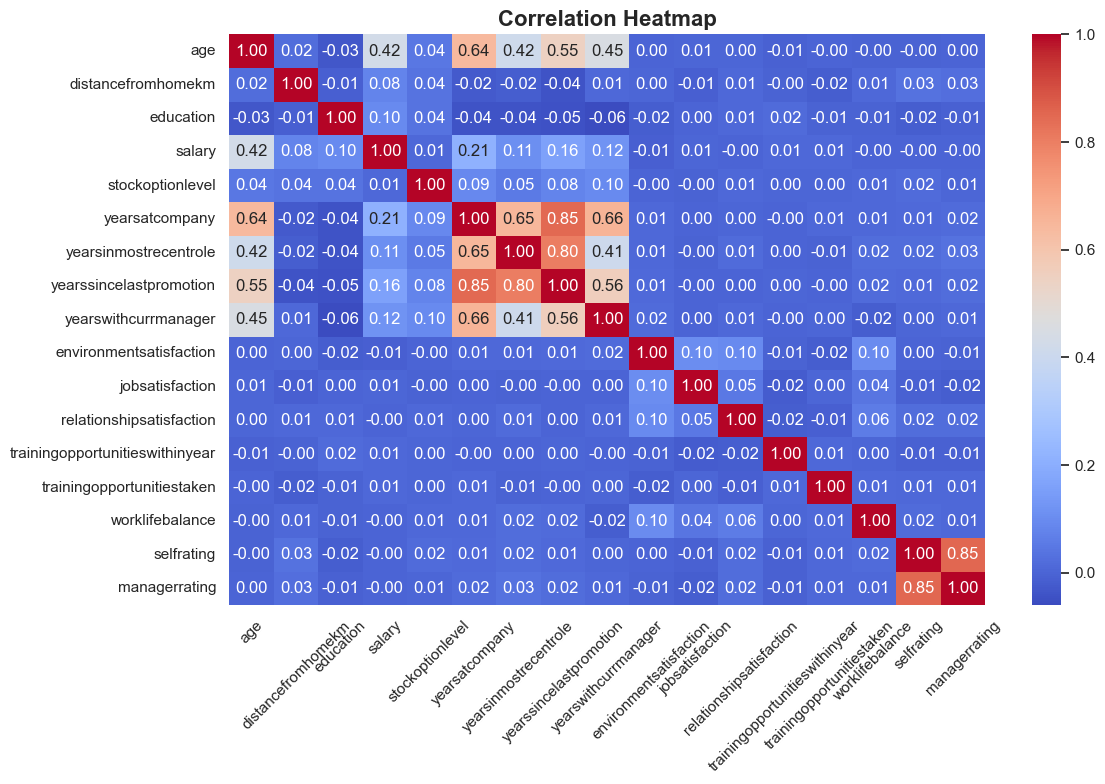

In [140]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 15. Which state has the highest attrition rate?

In [108]:
df[df['attrition'] == 'Yes']['state'].value_counts().head(1)

state
CA    1460
Name: count, dtype: int64

### 16. Department with most recent promotions.

In [110]:
df[df['yearssincelastpromotion'] <= 1]['department'].value_counts()

department
Technology         1212
Sales               748
Human Resources     100
Name: count, dtype: int64

### 17. Top 5 roles by average tenure.

In [112]:
df.groupby('jobrole')['yearsatcompany'].mean().sort_values(ascending=False).head(5)

jobrole
HR Manager             7.529412
HR Business Partner    6.640000
Engineering Manager    6.618893
Manager                6.572414
Analytics Manager      6.521127
Name: yearsatcompany, dtype: float64

### 18. Who gets promoted more: Overtime vs No Overtime.

In [114]:
df.groupby('overtime')['yearssincelastpromotion'].mean()

overtime
No     4.483110
Yes    3.457256
Name: yearssincelastpromotion, dtype: float64

### 19. Most stable department (highest yearswithcurrmanager).

In [116]:
df.groupby('department')['yearswithcurrmanager'].mean().sort_values(ascending=False)

department
Human Resources    3.230032
Technology         2.815771
Sales              2.525102
Name: yearswithcurrmanager, dtype: float64

### 20. Attrition rate by satisfaction level (environment, job, relationship).

In [122]:
df.groupby('environmentsatisfaction')['attrition'].value_counts(normalize=True)

environmentsatisfaction  attrition
1.0                      No           0.742647
                         Yes          0.257353
2.0                      No           0.687943
                         Yes          0.312057
3.0                      No           0.649028
                         Yes          0.350972
4.0                      No           0.675402
                         Yes          0.324598
5.0                      No           0.657869
                         Yes          0.342131
Name: proportion, dtype: float64

### 21. Which education level has the highest performers?

In [130]:
df.groupby('education')['managerrating'].mean().sort_values(ascending=False)

education
1    3.505952
5    3.488152
3    3.483295
2    3.456699
4    3.453078
Name: managerrating, dtype: float64

### 22. Correlation between years with manager and promotion gap.

In [149]:
df[['yearswithcurrmanager', 'yearssincelastpromotion']].corr()

,yearswithcurrmanager,yearssincelastpromotion
yearswithcurrmanager,1.000000,0.558008
yearssincelastpromotion,0.558008,1.000000


### 23. Attrition based on travel frequency.

In [151]:
df.groupby('businesstravel')['attrition'].value_counts(normalize=True)

businesstravel      attrition
Frequent Traveller  No           0.529412
                    Yes          0.470588
No Travel           No           0.818612
                    Yes          0.181388
Some Travel         No           0.694108
                    Yes          0.305892
Name: proportion, dtype: float64

### 24. Department Analysis Loop Summary.

In [167]:
def department_summary(df):
    summary = []
    departments = df['department'].unique()

    for dept in departments:
        subset = df[df['department'] == dept]
        avg_tenure = subset['yearsatcompany'].mean()
        avg_salary = subset['salary'].mean()
        attrition_rate = (subset['attrition'] == 'Yes').mean()
        
        if attrition_rate > 0.25:
            risk = "High Attrition"
        elif avg_tenure < 3:
            risk = "Low Tenure"
        else:
            risk = "Healthy"
        
        summary.append({
            'Department': dept,
            'Avg Tenure': round(avg_tenure, 2),
            'Avg Salary': round(avg_salary, 2),
            'Attrition Rate (%)': round(attrition_rate * 100, 2),
            'Status': risk
        })

    return pd.DataFrame(summary).sort_values(by='Attrition Rate (%)', ascending=False)
print(department_summary(df))

        Department  Avg Tenure  Avg Salary  Attrition Rate (%)          Status
0            Sales        5.39   120568.31               39.76  High Attrition
1  Human Resources        5.55   107629.56               36.74  High Attrition
2       Technology        5.68   106245.33               28.96  High Attrition
